In [ ]:
RegNo=['KL13AJ6562','KL55L2323']
ChasisNo=['MA3FSEB1S00376978','MJ4LIOG1M00984785']

In [ ]:
#Database
RegNo=['KL13AJ6562','KL55L2323']
ChasisNo=['MA3FSEB1S00 376978','MJ4LIOG1M00 984785']

path= 'C:/Users/NNL1COB/Desktop/repo/wiper_detection/received_images/'

number_plate= path+'number_plate.jpg'
chassis=path+'chassis.jpg'
pollution_certificate=path+'pollution_certificate.jpg'
#1
from PIL import Image
import pytesseract
pytesseract.pytesseract.tesseract_cmd =r"C:\Program Files\Tesseract-OCR\tesseract.exe"
import cv2
import re
import pytesseract as tess
import dateparser
import datetime

def test_all(number_plate,chassis,pollution_certificate):
    status_nb=0
    status_ch=0
    status_pc=0
    #import number plate image
    image = cv2.imread(number_plate)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    canny_edge = cv2.Canny(gray_image, 170, 200)
    contours, new  = cv2.findContours(canny_edge.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    contours=sorted(contours, key = cv2.contourArea, reverse = True)[:30]
    contour_with_license_plate = None
    license_plate = None
    x = None
    y = None
    w = None
    h = None

    for contour in contours:        
            perimeter = cv2.arcLength(contour, True)
            approx = cv2.approxPolyDP(contour, 0.01 * perimeter, True)
            if len(approx) == 4: 
                contour_with_license_plate = approx
                x, y, w, h = cv2.boundingRect(contour)
                license_plate = gray_image[y:y + h, x:x + w]
                break


    license_plate = cv2.bilateralFilter(license_plate, 11, 17, 17)
    (thresh, license_plate) = cv2.threshold(license_plate, 150, 180, cv2.THRESH_BINARY)
    text = pytesseract.image_to_string(license_plate, config="--psm 7")  
    s = ''.join(filter(str.isalnum, text))
    print("License Plate :", s)

    if s in RegNo:
        status_nb=1
        i=RegNo.index(s)
        c=ChasisNo[i]
        #print(c)
        #2
        #import chassis image   
        im = Image.open(chassis)
        text = pyt.image_to_string(image_file)
        a=re.findall("[A-Za-z]{2}\d[A-Za-z]{4}\d[A-Za-z]\d{2} \d{6}",text)
        #print(text)
        print('chassis no:'+ a[0])
        
        if a[0]==c:
            status_ch=1
            print("approved")
            #3


            #import pollution certificate
            image = Image.open(pollution_certificate)

            text = tess.image_to_string(image)
            text = text.split("\n")

            for line in text:
                m = re.match(r"valid[ ]*upto[ ]*[^\d]*(\d.+\d)", line, re.IGNORECASE)
                if m:

                    validupto_date = dateparser.parse(m.group(1))
                    print("Valid Till: "+str(validupto_date.date()))
                    if  validupto_date >= datetime.datetime.now():
                        status_pc=1
                        print("Pollution Certificate Valid")
                    else:
                        status_pc=0
                        print("Pollution Certificate Expired")


        else:
            print('Rejected')


    else:
        print('Rejected')
        status_nb=0
        
    return(status_nb,status_ch,status_pc)




In [ ]:

from flask import Flask, render_template, request,jsonify
import glob
import os
import skimage 
from skimage import measure
import cv2
import os
app = Flask(__name__)

@app.route('/pred', methods = ['GET', 'POST'])

def upload_file1():
    if request.method == 'POST':
        if 'files[]' not in request.files:
            print('not_found')
        files = request.files.getlist('files[]')
        #sv_path='C:/Users/NNL1COB/Desktop/repo/wiper_detection/received_images'
        sv_path=os.getcwd()
        for file in files:
            path=os.path.join(sv_path,file.filename)
            file.save(path)
    
    
    def test_all(number_plate,chassis,pollution_certificate):
        status_nb=0
        status_ch=0
        status_pc=0
        #import number plate image
        image = cv2.imread(number_plate)
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        canny_edge = cv2.Canny(gray_image, 170, 200)
        contours, new  = cv2.findContours(canny_edge.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
        contours=sorted(contours, key = cv2.contourArea, reverse = True)[:30]
        contour_with_license_plate = None
        license_plate = None
        x = None
        y = None
        w = None
        h = None

        for contour in contours:        
                perimeter = cv2.arcLength(contour, True)
                approx = cv2.approxPolyDP(contour, 0.01 * perimeter, True)
                if len(approx) == 4: 
                    contour_with_license_plate = approx
                    x, y, w, h = cv2.boundingRect(contour)
                    license_plate = gray_image[y:y + h, x:x + w]
                    break


        license_plate = cv2.bilateralFilter(license_plate, 11, 17, 17)
        (thresh, license_plate) = cv2.threshold(license_plate, 150, 180, cv2.THRESH_BINARY)
        text = pytesseract.image_to_string(license_plate, config="--psm 7")  
        s = ''.join(filter(str.isalnum, text))
        print("License Plate :", s)
        
        if s in RegNo:
            status_nb=1
            i=RegNo.index(s)
            c=ChasisNo[i]
            #print(c)
            #2
            #import chassis image   
            im = Image.open(chassis)
            text = pyt.image_to_string(image_file)
            a=re.findall("[A-Za-z]{2}\d[A-Za-z]{4}\d[A-Za-z]\d{2} \d{6}",text)
            #print(text)
            print('chassis no:'+ a[0])

            if a[0]==c:
                status_ch=1
                print("approved")
                #3


                #import pollution certificate
                image = Image.open(pollution_certificate)

                text = tess.image_to_string(image)
                text = text.split("\n")

                for line in text:
                    m = re.match(r"valid[ ]*upto[ ]*[^\d]*(\d.+\d)", line, re.IGNORECASE)
                    if m:

                        validupto_date = dateparser.parse(m.group(1))
                        print("Valid Till: "+str(validupto_date.date()))
                        if  validupto_date >= datetime.datetime.now():
                            status_pc=1
                            print("Pollution Certificate Valid")
                        else:
                            status_pc=0
                            print("Pollution Certificate Expired")


            else:
                print('Rejected')


        else:
            print('Rejected')
            status_nb=0

        return(status_nb,status_ch,status_pc)
    
    
    #Database
    RegNo=['KL13AJ6562','KL55L2323']
    ChasisNo=['MA3FSEB1S00 376978','MJ4LIOG1M00 984785']
    path= 'C:/Users/NNL1COB/Desktop/repo/wiper_detection/received_images'
    number_plate= path+'/number_plate.jpg'
    chassis=path+'/chassis.jpg'
    pollution_certificate=path+'/pollution_certificate.jpg'
    
    status_nb,status_ch,status_pc=test_all(number_plate,chassis,pollution_certificate)
    
    
    filenames = glob.glob(path + "/*")
    for f in filenames:
        os.remove(f)
        
    return jsonify({'number_plate_check':status_nb,
                    'chassis_number_check':status_ch,
                    'pollution_certificate_check':status_pc})

if __name__ == '__main__':
       app.run(port=5000)

In [ ]:
#Database
RegNo=['KL13AJ6562','KL55L2323']

ChasisNo=['MA3FSEB1S00 376978','MJ4LIOG1M00 984785']

#1
import cv2
import pytesseract
pytesseract.pytesseract.tesseract_cmd =r"C:\Program Files (x86)\Tesseract-OCR\tesseract.exe"

#import number plate image
image = cv2.imread('13.jpg')


gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

canny_edge = cv2.Canny(gray_image, 170, 200)


contours, new  = cv2.findContours(canny_edge.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
contours=sorted(contours, key = cv2.contourArea, reverse = True)[:30]


contour_with_license_plate = None
license_plate = None
x = None
y = None
w = None
h = None


for contour in contours:
        
        perimeter = cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, 0.01 * perimeter, True)
        if len(approx) == 4: 
            contour_with_license_plate = approx
            x, y, w, h = cv2.boundingRect(contour)
            license_plate = gray_image[y:y + h, x:x + w]
            break


license_plate = cv2.bilateralFilter(license_plate, 11, 17, 17)
(thresh, license_plate) = cv2.threshold(license_plate, 150, 180, cv2.THRESH_BINARY)


text = pytesseract.image_to_string(license_plate, config="--psm 7")

    
s = ''.join(filter(str.isalnum, text))
    

print("License Plate :", s)

if s in RegNo:
    i=RegNo.index(s)
    c=ChasisNo[i]
    #print(c)
    
    #2
    from PIL import Image
#     import pytesseract as pyt
#     pytesseract.pytesseract.tesseract_cmd =r"C:\Program Files\Tesseract-OCR\tesseract.exe"
    import re

    #import chassis image   
    image_file = 'maruti.jpeg'


    im = Image.open(image_file)
    text = pyt.image_to_string(image_file)


    a=re.findall("[A-Za-z]{2}\d[A-Za-z]{4}\d[A-Za-z]\d{2} \d{6}",text)

    #print(text)
    print('chassis no:'+ a[0])

    if a[0]==c:
        print("approved")
        
        
        
        #3
        import pytesseract as tess
        import dateparser
        import datetime

        #import pollution certificate
        image = Image.open('Emission2.jpg')

        text = tess.image_to_string(image)
        text = text.split("\n")

        for line in text:
            m = re.match(r"valid[ ]*upto[ ]*[^\d]*(\d.+\d)", line, re.IGNORECASE)
            if m:
                
                validupto_date = dateparser.parse(m.group(1))
                print("Valid Till: "+str(validupto_date.date()))
                if  validupto_date >= datetime.datetime.now():
                    print("Pollution Certificate Valid")
                else:
                    print("Pollution Certificate Expired")
        
     
    else:
        print('Rejected')
    
        
else:
    print('Rejected')

MARUTI SUZUK

MA3FSEB1SOO 376970

ENGINE NO. D13A- 1623170

 


chassis no:MA3FSEB1SOO 376970


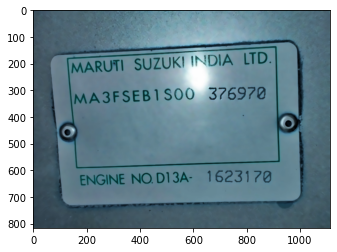

In [24]:
import re
from PIL import Image
import pytesseract
import pytesseract as pyt
pytesseract.pytesseract.tesseract_cmd =r"C:\Program Files (x86)\Tesseract-OCR\tesseract.exe"
  
image_file = 'maruti.jpeg'
import cv2 as cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread(image_file)
img = cv2.fastNlMeansDenoisingColored(img, None, 10, 10, 7, 15)
img = cv2.medianBlur(img,5)

plt.imshow(img)
text = pyt.image_to_string(img)
a=re.findall("[A-Za-z]{2}\d[A-Za-z]{4}\d[A-Za-z]{3} \d{6}",text)
print(text)
print('chassis no:'+ a[0])

In [16]:
import pytesseract
import pytesseract as tess
import pytesseract as pyt
pytesseract.pytesseract.tesseract_cmd =r"C:\Program Files (x86)\Tesseract-OCR\tesseract.exe"
import dateparser
import datetime
import cv2 as cv2
import re
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime
import image_slicer


image_file='Emission2.jpg'
img = cv2.imread(image_file)
image_slicer.slice('Emission2.jpg',4)
dates=[]

# img = cv2.fastNlMeansDenoisingColored(img, None, 10, 10, 7, 15)
#img = cv2.medianBlur(img,5)
#plt.imshow(img)
#print(text)


In [6]:
import os
import glob
from PIL import Image
import datetime
import dateparser
path =os.getcwd()
filenames = glob.glob(path + "/*.png")

for i in range(len(filenames)):
    print(filenames[i])
    im1 = Image.open(filenames[i])
    f=str(i)+'.jpg'
    im1.save(f)
    print(f)
    image = cv2.imread(f)
    text = tess.image_to_string(image)
    text = text.split("\n")
    
    for line in text:
        m=re.findall(r'\d{2}\-\d{2}\-\d{4}', line)
        if m:
            print(m)
            dates.append(m[0])

            
import datetime
import dateparser            
            
v_date=min(dates)
print(v_date)


C:\Users\NNL1COB\Desktop\repo\ocr_detection\Emission2_01_01.png
0.jpg
['19-00-2007']
C:\Users\NNL1COB\Desktop\repo\ocr_detection\Emission2_01_02.png
1.jpg
C:\Users\NNL1COB\Desktop\repo\ocr_detection\Emission2_02_01.png
2.jpg
C:\Users\NNL1COB\Desktop\repo\ocr_detection\Emission2_02_02.png
3.jpg
19-00-2007


In [8]:
validupto_date = dateparser.parse(v_date)
print("Valid Till: "+str(validupto_date.date()))
if  validupto_date >= datetime.datetime.now():
    print("Pollution Certificate Valid")
else:
    print("Pollution Certificate Expired")

Valid Till: 2007-10-19
Pollution Certificate Expired


In [5]:
image_file='3.jpg'
image = cv2.imread(image_file)

text = tess.image_to_string(image)
text = text.split("\n")
    
for line in text:
    m=re.findall(r'\d{2}\-\d{2}\-\d{4}', line)
    if m:
        print(m)
        dates.append(m[0])

v_date=min(dates)
print(v_date)

19-00-2007


In [ ]:
dates

In [ ]:
import cv2 as cv2
image_file='crop.jpg'

img = cv2.imread(image_file)
img.shape

In [ ]:
x=img.shape[0]
y=img.shape[1]

mx=int(x/2)
my=int(y/2)

mx,my

In [ ]:
3510
|
|
---381

In [ ]:

 
y=0
x=0
h=my
w=mx
crop_image = img[x:w, y:h]
cv2.imshow("Cropped", crop_image)
cv2.waitKey(0)

In [ ]:
crop_img = img[10:10, 10:10]
cv2.imshow("cropped", crop_img)

In [ ]:

# Let's get the starting pixel coordiantes (top left of cropped top)
start_row, start_col = int(0), int(0)
# Let's get the ending pixel coordinates (bottom right of cropped top)
end_row, end_col = int(height * .5), int(width)
cropped_top = image[start_row:end_row , start_col:end_col]


cv2.imshow("Cropped Top", cropped_top) 
cv2.waitKey(0) 
cv2.destroyAllWindows()
print (start_row, end_row) 
print (start_col, end_col)

In [ ]:
cv2.imshow("Cropped Top", cropped_top) 
cv2.waitKey(0) 
cv2.destroyAllWindows()

In [ ]:
cv2.imshow("Cropped Bot", cropped_bot) 
cv2.waitKey(0) 
cv2.destroyAllWindows()

In [25]:
import pytesseract
import pytesseract as pyt
pytesseract.pytesseract.tesseract_cmd =r"C:\Program Files (x86)\Tesseract-OCR\tesseract.exe"
from flask import Flask, render_template, request,jsonify
import glob
import os
import skimage 
from skimage import measure
import cv2
import os
app = Flask(__name__)
from PIL import Image
import re

@app.route('/chassis_check', methods = ['GET', 'POST'])

def upload_file1():
    if request.method == 'POST':
        if 'files[]' not in request.files:
            print('not_found')
        files = request.files.getlist('files[]')
        filenames=[]
        sv_path=os.getcwd()
        for file in files:
            path=os.path.join(sv_path,file.filename)
            filenames.append(path)
            file.save(path)
    
    
    def test_all(chassis):     
        img = cv2.imread(chassis)
        img = cv2.fastNlMeansDenoisingColored(img, None, 10, 10, 7, 15)
        img = cv2.medianBlur(img,5)
        text = pyt.image_to_string(img)
        a=re.findall("[A-Za-z]{2}\d[A-Za-z]{4}\d[A-Za-z]{3} \d{6}",text)
        chassis_no=a[0]
        chassis_no=chassis_no.replace(" ", "") 
        return(chassis_no)
    
    
    #Database
    chassis_no=test_all(filenames[0])
    os.remove(filenames[0])  
    return jsonify({'chassis_number_check':chassis_no})

if __name__ == '__main__':
       app.run(port=5000)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [31/Oct/2020 18:18:28] "POST /chassis_check HTTP/1.1" 200 -
127.0.0.1 - - [31/Oct/2020 19:13:05] "POST /horn_check HTTP/1.1" 404 -
127.0.0.1 - - [31/Oct/2020 19:13:25] "POST /horn_check HTTP/1.1" 404 -
127.0.0.1 - - [31/Oct/2020 19:14:13] "POST /horn_check HTTP/1.1" 404 -
127.0.0.1 - - [31/Oct/2020 19:14:27] "POST /horn_check HTTP/1.1" 404 -
127.0.0.1 - - [31/Oct/2020 19:14:48] "POST /horn_check HTTP/1.1" 404 -
127.0.0.1 - - [31/Oct/2020 19:15:28] "POST /horn_check HTTP/1.1" 404 -
127.0.0.1 - - [31/Oct/2020 19:19:50] "POST /horn_check HTTP/1.1" 404 -
127.0.0.1 - - [31/Oct/2020 19:25:26] "POST /horn_check HTTP/1.1" 404 -
127.0.0.1 - - [31/Oct/2020 19:25:50] "POST /horn_check HTTP/1.1" 404 -
127.0.0.1 - - [31/Oct/2020 19:27:11] "POST /horn_check HTTP/1.1" 404 -
127.0.0.1 - - [31/Oct/2020 19:28:09] "POST /horn_check HTTP/1.1" 404 -
